## Curso Python para Economistas
### Trabajo Práctico 3

### Fecha de entrega:
Sábado 14/10 a las 18:00 hs. (un día luego de la próxima clase sincrónica)

### Modalidad de entrega y trabajo
- Este TP es de **trabajo individual**.
- Se debe entregar por vía de un repositorio **privado** de GitHub, al cual se le debe habilitar acceso a los 5 profesores. Los nombres de usuario son: `belenmichel`, `rbonazzola`,  `Queeno11`, `agoszulli` y `pilarch`.
- Antes de la fecha y hora de entrega pueden hacer cuantos cambios quieran en el repositorio, pero luego de la hora de corte no deben hacer más cambios, a menos que quieran usar los días de gracia.
- Recuerden comentar cada commit con un mensaje específico (esto es simplemente una buena práctica, pero no los evaluaremos por esto, sólo el mensaje final es obligatorio, como indica el siguiente inciso).  
- Al finalizar el trabajo práctico deben hacer un último commit en su repositorio de GitHub con el mensaje “Entrega final del TP3”.
- Cuando hayan hecho ese último commit, copien la URL para clonar su repositorio y péguenla en esta planilla de Google: https://docs.google.com/spreadsheets/d/160DBUCMAMUPtpeWtRl0SJYyYd2Miv-sYuFQZO3J3MS0/edit?usp=sharing. Al ser un repositorio privado, por más que publiquen el link, sólo los colaboradores habilitados podrán verlo/clonarlo.
- La última versión en el repositorio es la que será evaluada. Para esto es importante que no completen el Google Sheet hasta que no hayan finalizado el TP, como tampoco hacer pushes posteriores a la entrega. 

### Ejercicios

_Nota: recuerden que su código debe estar comentado donde corresponda. Además los gráficos deben ser prolijos, con títulos en cada eje, título principal y_ tick labels _legibles. El estilo de los mismos será evaluado en este trabajo práctico._

**(1)** Vamos a trabajar con el archivo `potencia_instalada_mod.csv`. (_Nota: van a tener que definir el parametro `encoding='latin1'`)_. Abrirlo y crear un dataframe que tenga las siguientes columnas:  
- `periodo`
- `agente`  
- `agente_descripcion`  
- `region`  
- `categoria_region`  
- `fuente_generacion`  
- `tecnologia`  
- `potencia_instalada_mw`  
  
y cortar la base para quedarnos únicamente con las primeras 11497 filas.

In [14]:
import pandas as pd

# Cargamos el archivo en un dataframe con el delimitador correcto
df = pd.read_csv('potencia_instalada_mod.csv', encoding='latin1', sep='|')

# Seleccionamos las columnas que nos interesan
columnas_deseadas = [
    'periodo',
    'agente',
    'agente_descripcion',
    'region',
    'categoria_region',
    'fuente_generacion',
    'tecnologia',
    'potencia_instalada_mw'
]

df = df[columnas_deseadas]

# Nos quedamos únicamente con las primeras 11497 filas
df = df.iloc[:11497]

# Para verificar
print(df.head())


           periodo    agente    agente_descripcion        region  \
0  01/10/2015 0:00  CTBROWNG  C.T. ALMIRANTE BROWN   GRAN BS.AS.   
1  01/10/2015 0:00  CAPEXSAG   C.T. AGUA DEL CAJON       COMAHUE   
2  01/10/2015 0:00  HIDIAMAG        H. DIAMANTE SA          CUYO   
3  01/10/2015 0:00  CTAESPAG       C.T. AES PARANA  BUENOS AIRES   
4  01/10/2015 0:00  CTAESPAG       C.T. AES PARANA  BUENOS AIRES   

               categoria_region fuente_generacion         tecnologia  \
0  Gba - Litoral - Buenos Aires           Térmica       Motor Diesel   
1                       Comahue           Térmica  Ciclos Combinados   
2                          Cuyo        Hidráulica         Hidráulica   
3  Gba - Litoral - Buenos Aires           Térmica  Ciclos Combinados   
4  Gba - Litoral - Buenos Aires           Térmica  Ciclos Combinados   

   potencia_instalada_mw  
0                  25.00  
1                 184.40  
2                 150.00  
3                 525.96  
4                 319.3

In [2]:
## CC: Ejercicio 1, perfecto!

**(2)** En la sección "Preparamos los datos para graficar" del notebook de la clase sincrónica se ve un ejemplo de cómo transformar una columna a formato `datetime`. En este ejercicio les pedimos que cambien el formato con el que se muestra la columna `periodo`, de `1/10/2020` a `2020-10`, para crear una nueva columna llamada `periodo_formateado`. Luego inspeccionen el resultado. Si les dio como esperaban, ejecuten un comando de `.drop()` para eliminar la columna original.
  
_Nota: Además del notebook de la clase, buscar documentación online y ejemplos en Stack Overflow puede ser útil._

In [3]:
# Convertir la columna periodo a formato datetime, manejando el error de los datos no convertidos
df['periodo'] = pd.to_datetime(df['periodo'], errors='coerce')

# Crear la nueva columna con el formato deseado (año-mes)
df['periodo_formateado'] = df['periodo'].dt.to_period('M')

# Verificar el resultado
print(df[['periodo', 'periodo_formateado']].head())

# Si todo está correcto, eliminar la columna original
#df = df.drop('periodo', axis=1) 

     periodo periodo_formateado
0 2015-01-10            2015-01
1 2015-01-10            2015-01
2 2015-01-10            2015-01
3 2015-01-10            2015-01
4 2015-01-10            2015-01


In [15]:
## CC: Ejercicio 2, con este método estás teniendo el problema que te toma el día (01) como mes
##    periodo_formateado siempre pone mes 1 (cuando en realidad es el día, ver en ejercicio 1)
##    El error está en no especificar el formato en pd.to_datetime, te dejo el código corregido

#df['periodo'] = pd.to_datetime(df['periodo'], format="%d/%m/%Y %H:%M", errors="coerce")
#df['periodo_formateado'] = df['periodo'].dt.to_period('M')
#print(df[['periodo', 'periodo_formateado']].head())

##   Otra forma más directa de hacerlo es como en el notebook de la clase 3
df['periodo_formateado']=pd.to_datetime(df['periodo'],format="%d/%m/%Y %H:%M").dt.strftime("%Y-%m")

print(df[['periodo', 'periodo_formateado']].head())

##Nota 7/10

           periodo periodo_formateado
0  01/10/2015 0:00            2015-10
1  01/10/2015 0:00            2015-10
2  01/10/2015 0:00            2015-10
3  01/10/2015 0:00            2015-10
4  01/10/2015 0:00            2015-10


**(3)** En la clases de práctica vimos ejemplos de cómo agrupar información usando `.groupby()` y `.aggregate()`. Pongámoslo en práctica. Construyan un nuevo dataframe (con otro nombre para no pisar al original) donde el agrupamiento sea a nivel de periodo (la columna nueva) y tecnología. Ordenen el dataframe por fecha, en orden ascendente. Inspeccionen una muestra para ver que el resultado sea el esperado.
  

In [16]:
# Agrupar por periodo_formateado y tecnología, y sumar la potencia instalada para cada grupo
df_agrupado = df.groupby(['periodo_formateado', 'tecnologia'])['potencia_instalada_mw'].sum().reset_index()

# Convertir periodo_formateado a datetime para poder ordenar por fecha
df_agrupado['periodo_formateado'] = pd.to_datetime(df_agrupado['periodo_formateado'].astype(str))

# Ordenar por fecha, en orden ascendente
df_agrupado = df_agrupado.sort_values(by='periodo_formateado', ascending=True)

# Inspeccionar una muestra del resultado
print(df_agrupado.head())

  periodo_formateado         tecnologia  potencia_instalada_mw
0         2015-10-01             Biogas                  16.60
1         2015-10-01  Ciclos Combinados                9227.13
2         2015-10-01             Eólica                 187.35
3         2015-10-01         Hidráulica               11107.29
4         2015-10-01   Micro Hidráulica                   0.65


In [6]:
## CC: Ejercicio 3, perfecto!

**(4)** Ahora ejercitemos `matplotlib.pyplot`: importen la librería y construyan un gráfico de barras que muestre en el eje x el periodo y en el eje y la potencia instalada para una tecnología de su elección. El título del gráfico debe incluir la tecnología elegida y los ejes deben estar titulados.  
  
  
_Nota: No vimos como armar un gráfico de barras pero la estructura es similar al ejercicio resuelto del notebook. Parte de este ejercicio es practicar buscar cómo hacerlo en la documentación oficial y/u otros recursos online. Hay una comunidad grande de personas usando Python!_

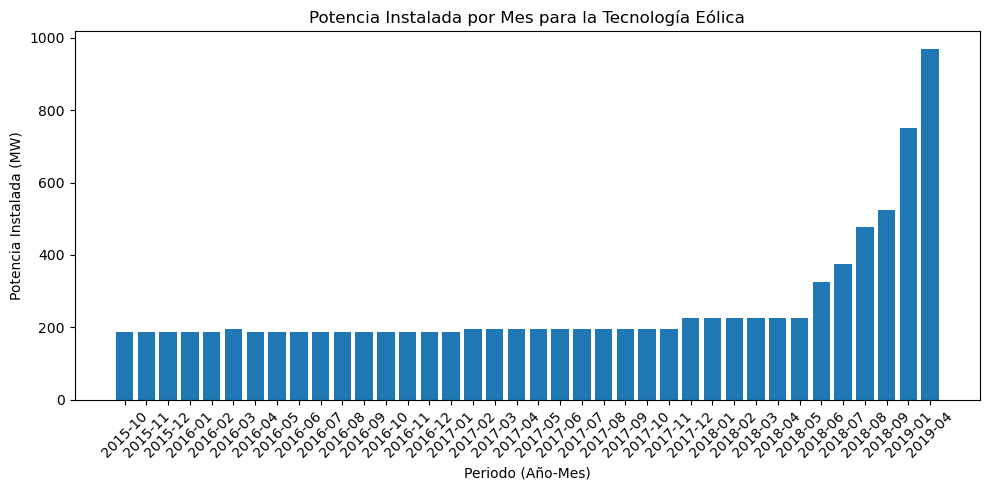

In [17]:
import matplotlib.pyplot as plt

# Seleccionar una tecnología específica, por ejemplo, 'Eólica'
tecnologia_seleccionada = 'Eólica'
df_filtrado = df_agrupado[df_agrupado['tecnologia'] == tecnologia_seleccionada]

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(df_filtrado['periodo_formateado'].dt.strftime('%Y-%m'), df_filtrado['potencia_instalada_mw'])

# Añadir título y etiquetas a los ejes
plt.title(f'Potencia Instalada por Mes para la Tecnología {tecnologia_seleccionada}')
plt.xlabel('Periodo (Año-Mes)')
plt.ylabel('Potencia Instalada (MW)')

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [8]:
## CC: Ejercicio 4, excelente. 

**(5)** Para seguir ejercitando `matplotlib`, construyan una figura con 4 gráficos de la potencia instalada por energía a lo largo el periodo, en una disposición de 2x2. Que por lo menos un gráfico sea de línea y por lo menos un gráfico sea de barra. Los otros dos gráficos pueden ser uno de línea y otro de barra o lo que ustedes quieran probar. Lo importante es practicar graficar y que el gráfico sea razonable. Si quieren que alguno de los gráficos muestre algo distinto de la evolución temporal de la potencia instalada, no hay problema.

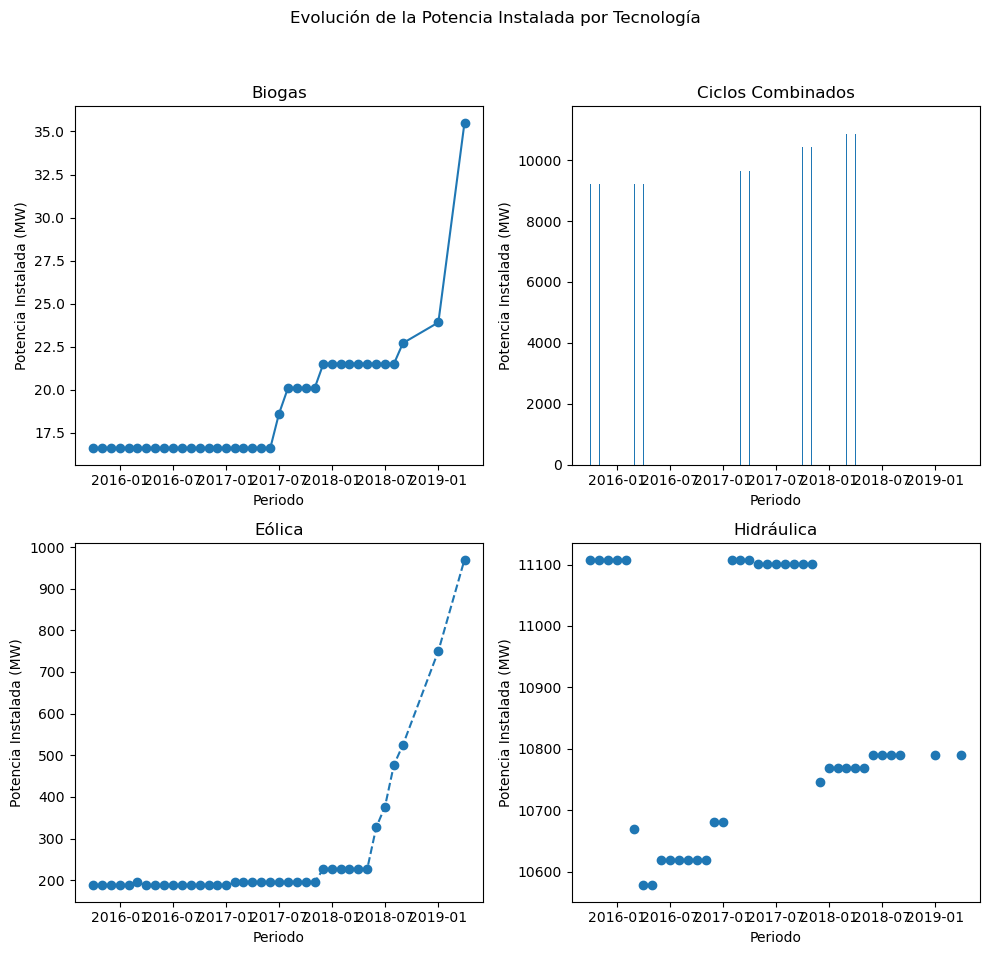

In [18]:

# Tecnologías para graficar
tecnologias = df_agrupado['tecnologia'].unique()[:4]

# Crear la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Evolución de la Potencia Instalada por Tecnología')

# Graficar la tecnología 1 - Gráfico de Línea
df_filtrado = df_agrupado[df_agrupado['tecnologia'] == tecnologias[0]]
axs[0, 0].plot(df_filtrado['periodo_formateado'], df_filtrado['potencia_instalada_mw'], marker='o')
axs[0, 0].set_title(tecnologias[0])
axs[0, 0].set_xlabel('Periodo')
axs[0, 0].set_ylabel('Potencia Instalada (MW)')

# Graficar la tecnología 2 - Gráfico de Barras
df_filtrado = df_agrupado[df_agrupado['tecnologia'] == tecnologias[1]]
axs[0, 1].bar(df_filtrado['periodo_formateado'], df_filtrado['potencia_instalada_mw'])
axs[0, 1].set_title(tecnologias[1])
axs[0, 1].set_xlabel('Periodo')
axs[0, 1].set_ylabel('Potencia Instalada (MW)')

# Graficar la tecnología 3 - Gráfico de Línea
df_filtrado = df_agrupado[df_agrupado['tecnologia'] == tecnologias[2]]
axs[1, 0].plot(df_filtrado['periodo_formateado'], df_filtrado['potencia_instalada_mw'], linestyle='--', marker='o')
axs[1, 0].set_title(tecnologias[2])
axs[1, 0].set_xlabel('Periodo')
axs[1, 0].set_ylabel('Potencia Instalada (MW)')

# Graficar la tecnología 4 - Gráfico a elección, por ejemplo, scatter plot
df_filtrado = df_agrupado[df_agrupado['tecnologia'] == tecnologias[3]]
axs[1, 1].scatter(df_filtrado['periodo_formateado'], df_filtrado['potencia_instalada_mw'])
axs[1, 1].set_title(tecnologias[3])
axs[1, 1].set_xlabel('Periodo')
axs[1, 1].set_ylabel('Potencia Instalada (MW)')

# Ajustar layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar el gráfico
plt.show()

In [ ]:
## CC: Ejercicio 5, bien! Pero podrías definir en el eje x algunos valores en los que tengas valores para que se aprecie mejor
##     Ejemplo:
tick_list = [
    '2015-01',
    '2016-01','2016-01','2016-01','2016-01',
    '2017-01','2017-01','2017-01','2017-01',
    '2018-01','2018-01','2018-01','2018-01'
]

# y luego definis al eje x únicamente con los valores de la lista
plt.xticks(tick_list, rotation='vertical',color='black')

# Nota 8/10

**(6)** Armen una figura con un gráfico que combine dos representaciones de datos de su elección. Podría ser combinar un gráfico de barras con uno de líneas, donde el eje vertical izquierdo muestre los valores de uno y el eje vertical derecho muestre los valores del otro. Por ejemplo que en el gráfico las barras muestren la variación de potencia instalada respecto al periodo pasado y una línea muestre la evolución de potencia instalada. _Nota: van a tener que trabajar sobre el dataframe para esto, la función `.shift()` aplicada a la columna de potencia instalada les puede ser útil como paso intermedio para calcular el crecimiento porcentual_.

C:\Users\Pilar\AppData\Local\Temp\ipykernel_18468\2643840313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnologia['variacion_potencia'] = df_tecnologia['potencia_instalada_mw'].pct_change() * 100


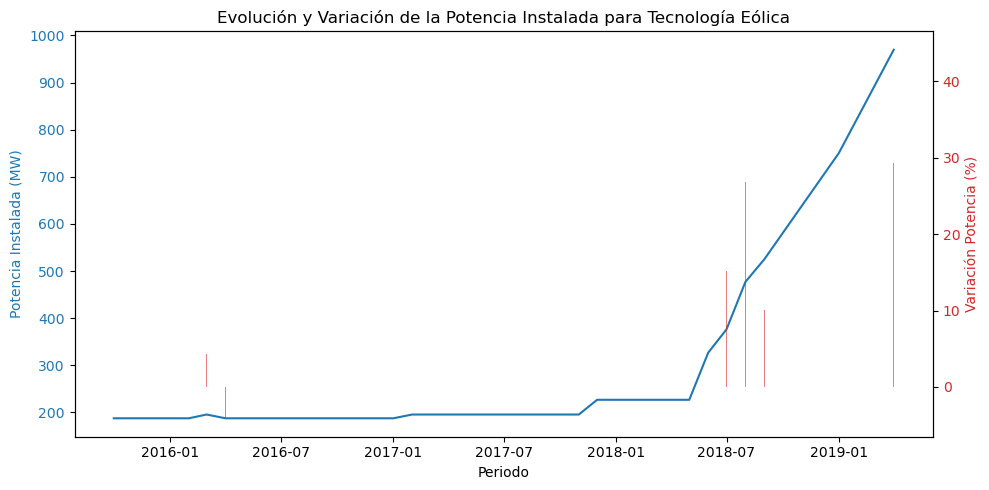

In [19]:
# Seleccionar una tecnología para el gráfico
tecnologia = 'Eólica'  # Reemplaza con la tecnología de tu elección

# Filtrar los datos para la tecnología seleccionada
df_tecnologia = df_agrupado[df_agrupado['tecnologia'] == tecnologia]

# Calcular la variación porcentual de la potencia instalada
df_tecnologia['variacion_potencia'] = df_tecnologia['potencia_instalada_mw'].pct_change() * 100

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Dibujar la línea para la evolución de la potencia instalada
color = 'tab:blue'
ax1.set_xlabel('Periodo')
ax1.set_ylabel('Potencia Instalada (MW)', color=color)
ax1.plot(df_tecnologia['periodo_formateado'], df_tecnologia['potencia_instalada_mw'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje y dibujar las barras para la variación porcentual
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Variación Potencia (%)', color=color)
ax2.bar(df_tecnologia['periodo_formateado'], df_tecnologia['variacion_potencia'], color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

# Título y layout
plt.title(f'Evolución y Variación de la Potencia Instalada para Tecnología {tecnologia}')
fig.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
## CC: Bien trabajado el grafico y bien logrado los dos ejes. 
##     Sin embargo, podría mostrarse mejor con la variación en líneas y la potencia en barras que además se corregiría reseteando bien el eje de fecha a año y mes
##     Te dejo abajo el código corregido

##Nota: 6/10

C:\Users\Pilar\AppData\Local\Temp\ipykernel_18468\2562876576.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnologia['variacion_potencia'] = df_tecnologia['potencia_instalada_mw'].pct_change() * 100


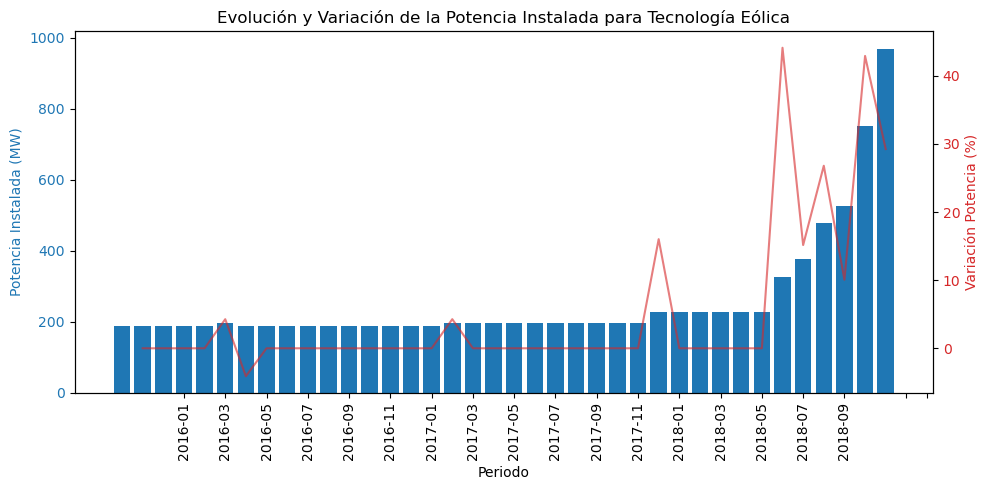

In [28]:
tick_list = [
    '2015-01',
    '2016-01','2016-03','2016-05','2016-07','2016-09','2016-11',
    '2017-01','2017-03','2017-05','2017-07','2017-09','2017-11',
    '2018-01','2018-03','2018-05','2018-07','2018-09','2018-11',
]

# Seleccionar una tecnología para el gráfico
tecnologia = 'Eólica'  # Reemplaza con la tecnología de tu elección

# Filtrar los datos para la tecnología seleccionada
df_tecnologia = df_agrupado[df_agrupado['tecnologia'] == tecnologia]

# Calcular la variación porcentual de la potencia instalada
df_tecnologia['variacion_potencia'] = df_tecnologia['potencia_instalada_mw'].pct_change() * 100

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Dibujar la línea para la evolución de la potencia instalada
color = 'tab:blue'
ax1.set_xlabel('Periodo')
ax1.set_ylabel('Potencia Instalada (MW)', color=color)
ax1.bar(df_tecnologia['periodo_formateado'].dt.strftime('%Y-%m'), df_tecnologia['potencia_instalada_mw'], color=color)  ## acá se incorpora el reseteo del eje x
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(tick_list, rotation='vertical',color='black')

# Crear un segundo eje y dibujar las barras para la variación porcentual
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Variación Potencia (%)', color=color)
ax2.plot(df_tecnologia['periodo_formateado'].dt.strftime('%Y-%m'), df_tecnologia['variacion_potencia'], color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

# Título y layout
plt.title(f'Evolución y Variación de la Potencia Instalada para Tecnología {tecnologia}')
fig.tight_layout()

# Mostrar el gráfico
plt.show()



**(7)** En este ejercicio les pedimos que busquen en la documentación de `matplotlib` las diferentes opciones de gráficos disponibles. Armen un gráfico distinto a lo que hayan aplicado en los ejercicios anteriores.

C:\Users\Pilar\AppData\Local\Temp\ipykernel_18468\1881243321.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnologia['variacion_potencia'] = df_tecnologia['potencia_instalada_mw'].pct_change() * 100


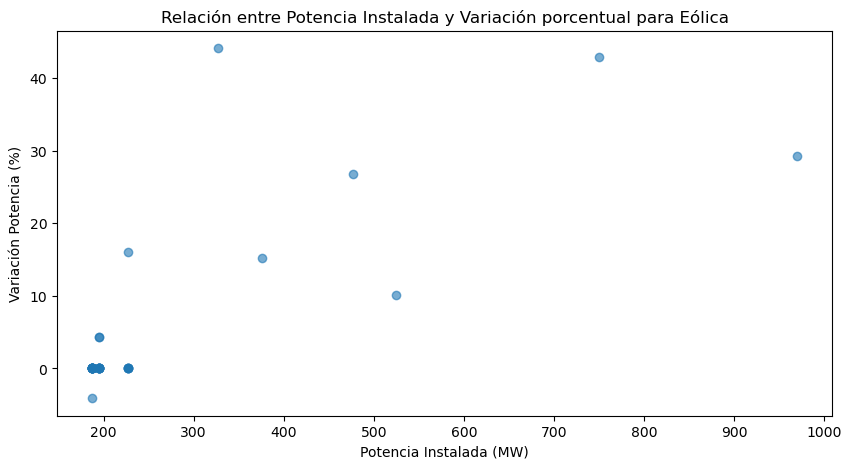

In [29]:
# Seleccionar una tecnología para el gráfico
tecnologia = 'Eólica'  # Reemplaza con la tecnología de tu elección

# Filtrar los datos para la tecnología seleccionada
df_tecnologia = df_agrupado[df_agrupado['tecnologia'] == tecnologia]

# Calcular la variación porcentual de la potencia instalada
df_tecnologia['variacion_potencia'] = df_tecnologia['potencia_instalada_mw'].pct_change() * 100

# Crear el scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df_tecnologia['potencia_instalada_mw'], df_tecnologia['variacion_potencia'], alpha=0.6)

# Títulos y etiquetas
plt.title(f'Relación entre Potencia Instalada y Variación porcentual para {tecnologia}')
plt.xlabel('Potencia Instalada (MW)')
plt.ylabel('Variación Potencia (%)')

# Mostrar el gráfico
plt.show()

In [ ]:
## CC: Ejercicio 7, correcto

#### NOTA TP: 

In [30]:
# Parámetros
cant_ejercicios = 7
ponderacion = [0.1,0.1,0.1,0.1,0.2,0.2,0.2]
puntos = [10,7,10,10,8,6,10]

# Verifica que todo esté ok
assert cant_ejercicios == len(ponderacion), "La cantidad de ejercicios no es la misma que los ponderadores! Verificar..."
assert cant_ejercicios == len(puntos), "Falta la nota de algún ejercicio! Verificar..."
assert sum(ponderacion) == 1, "Los ponderadores no suman! Verificar..." 

# Imprime la nota

ptos_tot=0
for i in range(cant_ejercicios):
    print(f"Nota del ejercicio {i+1}: {puntos[i]}/10, que respresentan un {int(ponderacion[i]*100)}% de la nota total")
    ptos_tot += puntos[i]*ponderacion[i]

print(f"##########################################")
print(f"#####   La nota de este TP es {round(ptos_tot,3)}   #####")
print(f"##########################################")

Nota del ejercicio 1: 10/10, que respresentan un 10% de la nota total
Nota del ejercicio 2: 7/10, que respresentan un 10% de la nota total
Nota del ejercicio 3: 10/10, que respresentan un 10% de la nota total
Nota del ejercicio 4: 10/10, que respresentan un 10% de la nota total
Nota del ejercicio 5: 8/10, que respresentan un 20% de la nota total
Nota del ejercicio 6: 6/10, que respresentan un 20% de la nota total
Nota del ejercicio 7: 10/10, que respresentan un 20% de la nota total
##########################################
#####   La nota de este TP es 8.5   #####
##########################################
